In [1]:
#importing
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [2]:
#loading data
df_numeric = pd.read_csv('df_numeric.csv')

In [3]:
df_numeric.head(5)

MSSubClass  LotFrontage  LotArea  Street  LotShape  Utilities  LandSlope  \
0          60         65.0     8450       2         4          4          3   
1          20         80.0     9600       2         4          4          3   
2          60         68.0    11250       2         3          4          3   
3          70         60.0     9550       2         3          4          3   
4          60         84.0    14260       2         3          4          3   

   OverallQual  OverallCond  YearBuilt  ...  MoSold  YrSold  SalePrice  \
0            7            5       2003  ...       2    2008     208500   
1            6            8       1976  ...       5    2007     181500   
2            7            5       2001  ...       9    2008     223500   
3            7            5       1915  ...       2    2006     140000   
4            8            5       2000  ...      12    2008     250000   

   GarageYrBlt_missing_ind  LotFrontage_missing_ind  MasVnrArea_missing_ind  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       0   

   1stFlrSF_log  1stFlr_2ndFlr_SF  OverallGrade  SimplGarageQual  
0      6.752270              1710            35                1  
1      7.140453              1262            48                1  
2      6.824374              1786            35                1  
3      6.867974              1717            35                1  
4      7.043160              2198            40                1  

[5 rows x 60 columns]

In [4]:
print(f"there are {df_numeric.shape[1]} features and {df_numeric.shape[0]} observations in dataset.")

there are 60 features and 1458 observations in dataset.


### Steps
1. Use features selections techniques significant features(above corr threshold) in our dataset
2. develop Model with significant features
3. add one by one other non-significant features to our Model to see how R-squared and adjust R-squared change

In [5]:
#drop target columns
y = df_numeric.SalePrice
df_numeric.drop("SalePrice", axis=1, inplace=True)

In [6]:
# removes all features whose variance doesn’t meet some threshold. 
#By default, it removes all zero-variance features, 
#i.e. features that have the same value in all samples.
vt = VarianceThreshold(0.25)
df_transformed = vt.fit_transform(df_numeric)

In [7]:
df_transformed

array([[   60.,    65.,  8450., ...,  2008.,  1710.,    35.],
       [   20.,    80.,  9600., ...,  2007.,  1262.,    48.],
       [   60.,    68., 11250., ...,  2008.,  1786.,    35.],
       ...,
       [   70.,    66.,  9042., ...,  2010.,  2340.,    63.],
       [   20.,    68.,  9717., ...,  2010.,  1078.,    30.],
       [   20.,    75.,  9937., ...,  2008.,  1256.,    30.]])

In [8]:
#return True or False coresponding to variance threshold drop off columns above
#False means that feature dropped from dataset
vt.get_support()

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False])

In [9]:
#get all features has variance higher than threshold
selected_columns = df_numeric.columns[vt.get_support()]
###
df_variance = pd.DataFrame(df_transformed, columns = selected_columns)

In [10]:
df_variance.head(5)

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0        60.0         65.0   8450.0       4.0          7.0          5.0   
1        20.0         80.0   9600.0       4.0          6.0          8.0   
2        60.0         68.0  11250.0       3.0          7.0          5.0   
3        70.0         60.0   9550.0       3.0          7.0          5.0   
4        60.0         84.0  14260.0       3.0          8.0          5.0   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  OpenPorchSF  \
0     2003.0        2003.0       196.0        4.0  ...         61.0   
1     1976.0        1976.0         0.0        3.0  ...          0.0   
2     2001.0        2002.0       162.0        4.0  ...         42.0   
3     1915.0        1970.0         0.0        3.0  ...         35.0   
4     2000.0        2000.0       350.0        4.0  ...         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3          272.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   1stFlr_2ndFlr_SF  OverallGrade  
0            1710.0          35.0  
1            1262.0          48.0  
2            1786.0          35.0  
3            1717.0          35.0  
4            2198.0          40.0  

[5 rows x 47 columns]

In [11]:
#get correlations between features
df_corr = df_variance.corr().abs()

In [12]:
#plotting df_corr
df_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

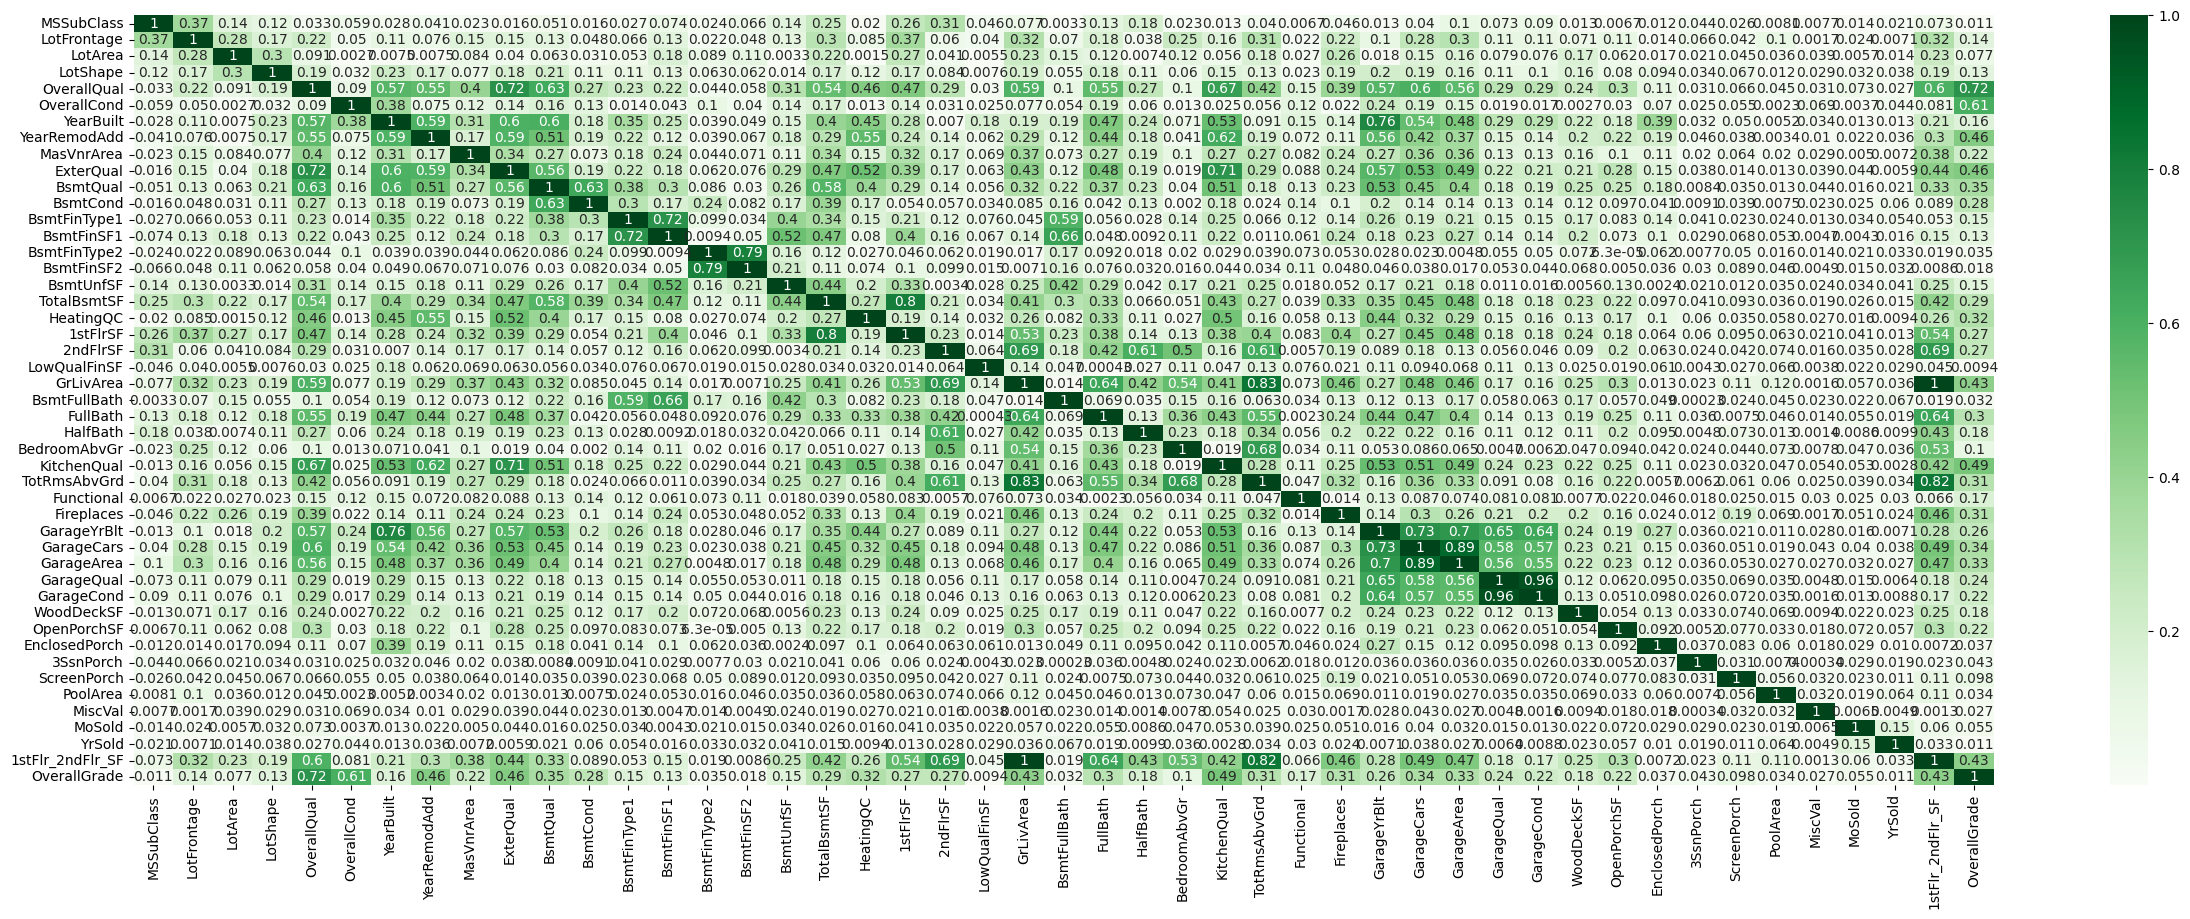

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
sns.heatmap(df_corr, cmap="Greens",annot=True)
plt.show()

In [14]:
#more capable, interactive and easier to use alternatives.
import plotly.express as px

#####
fig = px.imshow(df_corr)
fig.show()

In [15]:
df_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_missing_ind',
       'LotFrontage_missing_ind', 'MasVnrArea_missing_ind', '1stFlrSF_log',
       '1stFlr_2ndFlr_SF', 'OverallGrade', 'SimplGarageQual'],
      dtype='object')

In [16]:
df_variance.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       '1stFlr_2ndFlr_SF', 'OverallGrade'],
      dtype='object')

In [49]:
#dropped features in df_numeric
low_variances_features = [i for i in df_numeric.columns if i not in df_variance.columns]
print("dropped features in df_numeric",low_variances_features)

dropped features in df_numeric ['Street', 'Utilities', 'LandSlope', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'GarageYrBlt_missing_ind', 'LotFrontage_missing_ind', 'MasVnrArea_missing_ind', '1stFlrSF_log', '1stFlr_2ndFlr_SF', 'OverallGrade', 'SimplGarageQual']


In [18]:
print(df_corr.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       '1stFlr_2ndFlr_SF', 'OverallGrade'],
      dtype='object')


In [42]:
df_corr.head(5)

MSSubClass  LotFrontage   LotArea  LotShape  OverallQual  \
MSSubClass     1.000000     0.374663  0.142033  0.116473     0.032522   
LotFrontage    0.374663     1.000000  0.276157  0.168947     0.218782   
LotArea        0.142033     0.276157  1.000000  0.303146     0.091392   
LotShape       0.116473     0.168947  0.303146  1.000000     0.190817   
OverallQual    0.032522     0.218782  0.091392  0.190817     1.000000   

             OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  \
MSSubClass      0.059275   0.027757      0.040503    0.023423   0.015982  ...   
LotFrontage     0.050342   0.111102      0.075812    0.151042   0.146183  ...   
LotArea         0.002723   0.007462      0.007500    0.083715   0.040373  ...   
LotShape        0.032042   0.226674      0.172670    0.076833   0.180443  ...   
OverallQual     0.090442   0.571368      0.549827    0.398785   0.723286  ...   

             OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
MSSubClass      0.006659       0.012002   0.043813     0.026004  0.008090   
LotFrontage     0.105447       0.013934   0.066350     0.042141  0.100395   
LotArea         0.061861       0.016505   0.021362     0.045288  0.036491   
LotShape        0.079791       0.094430   0.034485     0.066678  0.011531   
OverallQual     0.297186       0.113176   0.030991     0.066298  0.044758   

              MiscVal    MoSold    YrSold  1stFlr_2ndFlr_SF  OverallGrade  
MSSubClass   0.007675  0.013581  0.021386          0.072976      0.011288  
LotFrontage  0.001732  0.023697  0.007099          0.321809      0.141997  
LotArea      0.039072  0.005744  0.013699          0.234489      0.076785  
LotShape     0.029176  0.031968  0.037661          0.194933      0.133939  
OverallQual  0.031238  0.072531  0.026575          0.597633      0.715808  

[5 rows x 47 columns]

In [43]:
df_corr.shape

(47, 47)

In [19]:
df_corr >= 0.45

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  \
MSSubClass              True        False    False     False        False   
LotFrontage            False         True    False     False        False   
LotArea                False        False     True     False        False   
LotShape               False        False    False      True        False   
OverallQual            False        False    False     False         True   
OverallCond            False        False    False     False        False   
YearBuilt              False        False    False     False         True   
YearRemodAdd           False        False    False     False         True   
MasVnrArea             False        False    False     False        False   
ExterQual              False        False    False     False         True   
BsmtQual               False        False    False     False         True   
BsmtCond               False        False    False     False        False   
BsmtFinType1           False        False    False     False        False   
BsmtFinSF1             False        False    False     False        False   
BsmtFinType2           False        False    False     False        False   
BsmtFinSF2             False        False    False     False        False   
BsmtUnfSF              False        False    False     False        False   
TotalBsmtSF            False        False    False     False         True   
HeatingQC              False        False    False     False         True   
1stFlrSF               False        False    False     False         True   
2ndFlrSF               False        False    False     False        False   
LowQualFinSF           False        False    False     False        False   
GrLivArea              False        False    False     False         True   
BsmtFullBath           False        False    False     False        False   
FullBath               False        False    False     False         True   
HalfBath               False        False    False     False        False   
BedroomAbvGr           False        False    False     False        False   
KitchenQual            False        False    False     False         True   
TotRmsAbvGrd           False        False    False     False        False   
Functional             False        False    False     False        False   
Fireplaces             False        False    False     False        False   
GarageYrBlt            False        False    False     False         True   
GarageCars             False        False    False     False         True   
GarageArea             False        False    False     False         True   
GarageQual             False        False    False     False        False   
GarageCond             False        False    False     False        False   
WoodDeckSF             False        False    False     False        False   
OpenPorchSF            False        False    False     False        False   
EnclosedPorch          False        False    False     False        False   
3SsnPorch              False        False    False     False        False   
ScreenPorch            False        False    False     False        False   
PoolArea               False        False    False     False        False   
MiscVal                False        False    False     False        False   
MoSold                 False        False    False     False        False   
YrSold                 False        False    False     False        False   
1stFlr_2ndFlr_SF       False        False    False     False         True   
OverallGrade           False        False    False     False         True   

                  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
MSSubClass              False      False         False       False      False   
LotFrontage             False      False         False       False      False   
LotArea                 False      False         False       False      False 

In [33]:
#Now we drop all those features with correlation under 0.45
# 
np_indices = np.where(df_corr >= 0.45) #np.where to get indices
#get those features pairs names, base on np_indices
features_pairs = [(df_corr.index[x], df_corr.columns[y]) for x,y in zip(*np_indices) if x != y and x < y]

In [34]:
len(features_pairs)

91

In [40]:
features_pairs[1:5]

[('OverallQual', 'YearRemodAdd'),
 ('OverallQual', 'ExterQual'),
 ('OverallQual', 'BsmtQual'),
 ('OverallQual', 'TotalBsmtSF')]

In [44]:
#pairs corr in features are repeating features, we can drop
for pair in features_pairs:
    try:
        df_variance.drop(pair[1], axis = 1, inplace=True)
    except KeyError:
        pass
        

In [45]:
df_variance

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0           60.0         65.0   8450.0       4.0          7.0          5.0   
1           20.0         80.0   9600.0       4.0          6.0          8.0   
2           60.0         68.0  11250.0       3.0          7.0          5.0   
3           70.0         60.0   9550.0       3.0          7.0          5.0   
4           60.0         84.0  14260.0       3.0          8.0          5.0   
...          ...          ...      ...       ...          ...          ...   
1453        60.0         62.0   7917.0       4.0          6.0          5.0   
1454        20.0         85.0  13175.0       4.0          6.0          6.0   
1455        70.0         66.0   9042.0       4.0          7.0          9.0   
1456        20.0         68.0   9717.0       4.0          5.0          6.0   
1457        20.0         75.0   9937.0       4.0          5.0          6.0   

      MasVnrArea  BsmtFinType1  BsmtFinType2  2ndFlrSF  ...  Functional  \
0          196.0           6.0           1.0     854.0  ...         8.0   
1            0.0           5.0           1.0       0.0  ...         8.0   
2          162.0           6.0           1.0     866.0  ...         8.0   
3            0.0           5.0           1.0     756.0  ...         8.0   
4          350.0           6.0           1.0    1053.0  ...         8.0   
...          ...           ...           ...       ...  ...         ...   
1453         0.0           1.0           1.0     694.0  ...         8.0   
1454       119.0           5.0           3.0       0.0  ...         7.0   
1455         0.0           6.0           1.0    1152.0  ...         8.0   
1456         0.0           6.0           3.0       0.0  ...         8.0   
1457         0.0           4.0           2.0       0.0  ...         8.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0            0.0         61.0            0.0        0.0          0.0   
1          298.0          0.0            0.0        0.0          0.0   
2            0.0         42.0            0.0        0.0          0.0   
3            0.0         35.0          272.0        0.0          0.0   
4          192.0         84.0            0.0        0.0          0.0   
...          ...          ...            ...        ...          ...   
1453         0.0         40.0            0.0        0.0          0.0   
1454       349.0          0.0            0.0        0.0          0.0   
1455         0.0         60.0            0.0        0.0          0.0   
1456       366.0          0.0          112.0        0.0          0.0   
1457       736.0         68.0            0.0        0.0          0.0   

      PoolArea  MiscVal  MoSold  YrSold  
0          0.0      0.0     2.0  2008.0  
1          0.0      0.0     5.0  2007.0  
2          0.0      0.0     9.0  2008.0  
3          0.0      0.0     2.0  2006.0  
4          0.0      0.0    12.0  2008.0  
...        ...      ...     ...     ...  
1453       0.0      0.0     8.0  2007.0  
1454       0.0      0.0     2.0  2010.0  
1455       0.0   2500.0     5.0  2010.0  
1456       0.0      0.0     4.0  2010.0  
1457       0.0      0.0     6.0  2008.0  

[1458 rows x 21 columns]